In [4]:
import numpy as np
import pandas as pd

In [3]:
for i in range(1,6):
    for j in range(3):
        raw_data = pd.read_excel('RawData/p_{0}_S_{1}.xlsx'.format(i,j))
        raw_data = raw_data.rolling(window=100,axis=0)
        raw_data = raw_data.max()
       

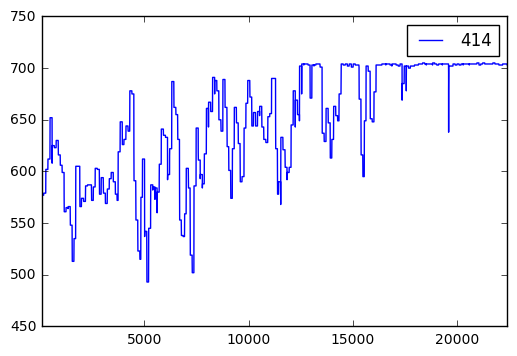

In [15]:
import matplotlib.pyplot as plt
raw_data[98:].plot()
plt.show()

In [14]:
class DataGen():
    
    def __init__(self,win):
        
        
        for j in range(1,7):
            combine_buffer=pd.DataFrame()
            for i in range(3):

                self.raw_data=pd.read_excel('RawData/P_{1}_S_{0}.xlsx'.format(i,j))
                #self.raw_data = self.raw_data.rolling(window=1000,axis=0)
                #self.raw_data = self.raw_data.max()
                self.raw_data=self.series_to_supervised(np.asarray(self.raw_data),win)
                if(i==0):
                    self.raw_data['Label']='Low_Stress'

                if(i==1):

                    self.raw_data['Label']='Medium_Stress'
                if(i==2):

                    self.raw_data['Label']='High_Stress'

                combine_buffer=pd.concat([combine_buffer,self.raw_data])

            combine_buffer.to_pickle('subsample_5000/P_{0}_win_{1}.csv'.format(j,win))
        
        
        
        
    
    def series_to_supervised(self,data, n_in=1, dropnan=True):




        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)

        return agg

In [16]:
DataGen(5000)

In [23]:
raw_data.shape
combine_buffer.shape

NameError: name 'combine_buffer' is not defined